| Gene  | Ensembl ID         |
|-------|--------------------|
| C1QA  | ENSG00000173372    |
| C1QC  | ENSG00000159189    |
| C1QB  | ENSG00000173369    |
| FCN3  | ENSG00000142748    |
| CFH   | ENSG00000000971    |
| CD55  | ENSG00000196352    |
| CR1   | ENSG00000203710    |
| CD46  | ENSG00000117335    |
| C1D   | ENSG00000197223    |
| CFI   | ENSG00000205403    |
| C7    | ENSG00000112936    |
| C2    | ENSG00000166278    |
| CFP   | ENSG00000126759    |
| VCP   | ENSG00000165280    |
| C5    | ENSG00000106804    |
| FCN2  | ENSG00000160339    |
| FCN1  | ENSG00000085265    |
| CD59  | ENSG00000085063    |
| C1S   | ENSG00000182326    |
| C1R   | ENSG00000159403    |
| C3AR1 | ENSG00000171860    |
| C1QBP | ENSG00000108561    |
| CFD   | ENSG00000197766    |
| C3    | ENSG00000125730    |
| C5AR1 | ENSG00000197405    |
| C5AR2 | ENSG00000134830    |
| C6    | ENSG00000039537    |
| C9    | ENSG00000113600    |
| CR2   | ENSG00000117322    |
| C4B   | ENSG00000224389    |
| CFB   | ENSG00000243649    |
| C4A   | ENSG00000244731    |


In [1]:
# Prepare the environment
import gget

gget.setup("cellxgene")

# Uncomment the following line to see the documentation
# help(gget.cellxgene)

16:12:00 - INFO - Installing cellxgene-census package (requires pip).
16:12:02 - INFO - cellxgene_census installed succesfully.


In [2]:
'''
Query the cellxgene database for the genes of interest
Filters:
Genes: C1QA, C1QC, C1QB, FCN3, CFH, CD55, CR1, CD46, C1D, CFI, C7, C2, CFP, VCP, C5, FCN2, FCN1, CD59, C1S, C1R, C3AR1, C1QBP, CFD, C3, C5AR1, C5AR2, C6, C9, CR2, C4B, CFB, C4A
disease: normal
tissue_general: kidney

> Query Time: 3m 30s

'''
adata = gget.cellxgene(
    ensembl=True,
    verbose=True,
    gene=["ENSG00000173372", "ENSG00000159189", "ENSG00000173369", "ENSG00000000971", "ENSG00000196352", "ENSG00000203710", "ENSG00000117335", "ENSG00000197223", "ENSG00000205403", "ENSG00000112936", "ENSG00000166278", "ENSG00000126759", "ENSG00000106804", "ENSG00000085063", "ENSG00000182326", "ENSG00000159403", "ENSG00000171860", "ENSG00000108561", "ENSG00000197766", "ENSG00000125730", "ENSG00000197405", "ENSG00000134830", "ENSG00000039537", "ENSG00000113600", "ENSG00000117322", "ENSG00000224389", "ENSG00000243649", "ENSG00000244731"],
    disease='normal',
    tissue_general='kidney',

)

16:12:02 - INFO - Fetching AnnData object from CZ CELLxGENE Discover. This might take a few minutes...
The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
/Users/aumchampaneri/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/gget/gget_cellxgene.py:189: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(


In [3]:
print(adata.var_names[:10])  # Show the first 10 feature names
print(adata.var["feature_name"].head())  # Print first few feature names
adata.var_names = adata.var["feature_name"]
print([name for name in adata.var_names if "CFH" in name])
gene_map = dict(zip(adata.var["feature_name"], adata.var_names))
features_to_plot = [gene_map[gene] for gene in ['CFH', 'C5', 'C3AR1', 'C3_ENSG00000125730', 'C5AR1'] if gene in gene_map]

# sc.pl.violin(adata, features_to_plot, groupby="tissue_general", multi_panel=True)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
0    C1QA
1    C1QC
2    C1QB
3     CFH
4    CD55
Name: feature_name, dtype: object
['CFH']


In [4]:
import pandas as pd
pd.set_option("display.max_rows", None)  # Ensure all rows are displayed
print(pd.Series(adata.obs["cell_type"].unique()))


0                                   renal principal cell
1                            kidney collecting duct cell
2        kidney distal convoluted tubule epithelial cell
3      kidney loop of Henle thick ascending limb epit...
4                                             macrophage
5                          renal alpha-intercalated cell
6                     epithelial cell of proximal tubule
7                           renal beta-intercalated cell
8                         vasa recta ascending limb cell
9                                               monocyte
10                     columnar/cuboidal epithelial cell
11                vascular associated smooth muscle cell
12                 glomerular capillary endothelial cell
13                       vasa recta descending limb cell
14                                   natural killer cell
15                                                T cell
16                                               unknown
17                             

Found 28 valid genes


/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_15486/286855128.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_mean_expr = all_expression_data.groupby("Cell_Type")["Expression"].mean()
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_15486/286855128.py:51: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = filtered_data.pivot_table(


<Figure size 2000x2000 with 0 Axes>

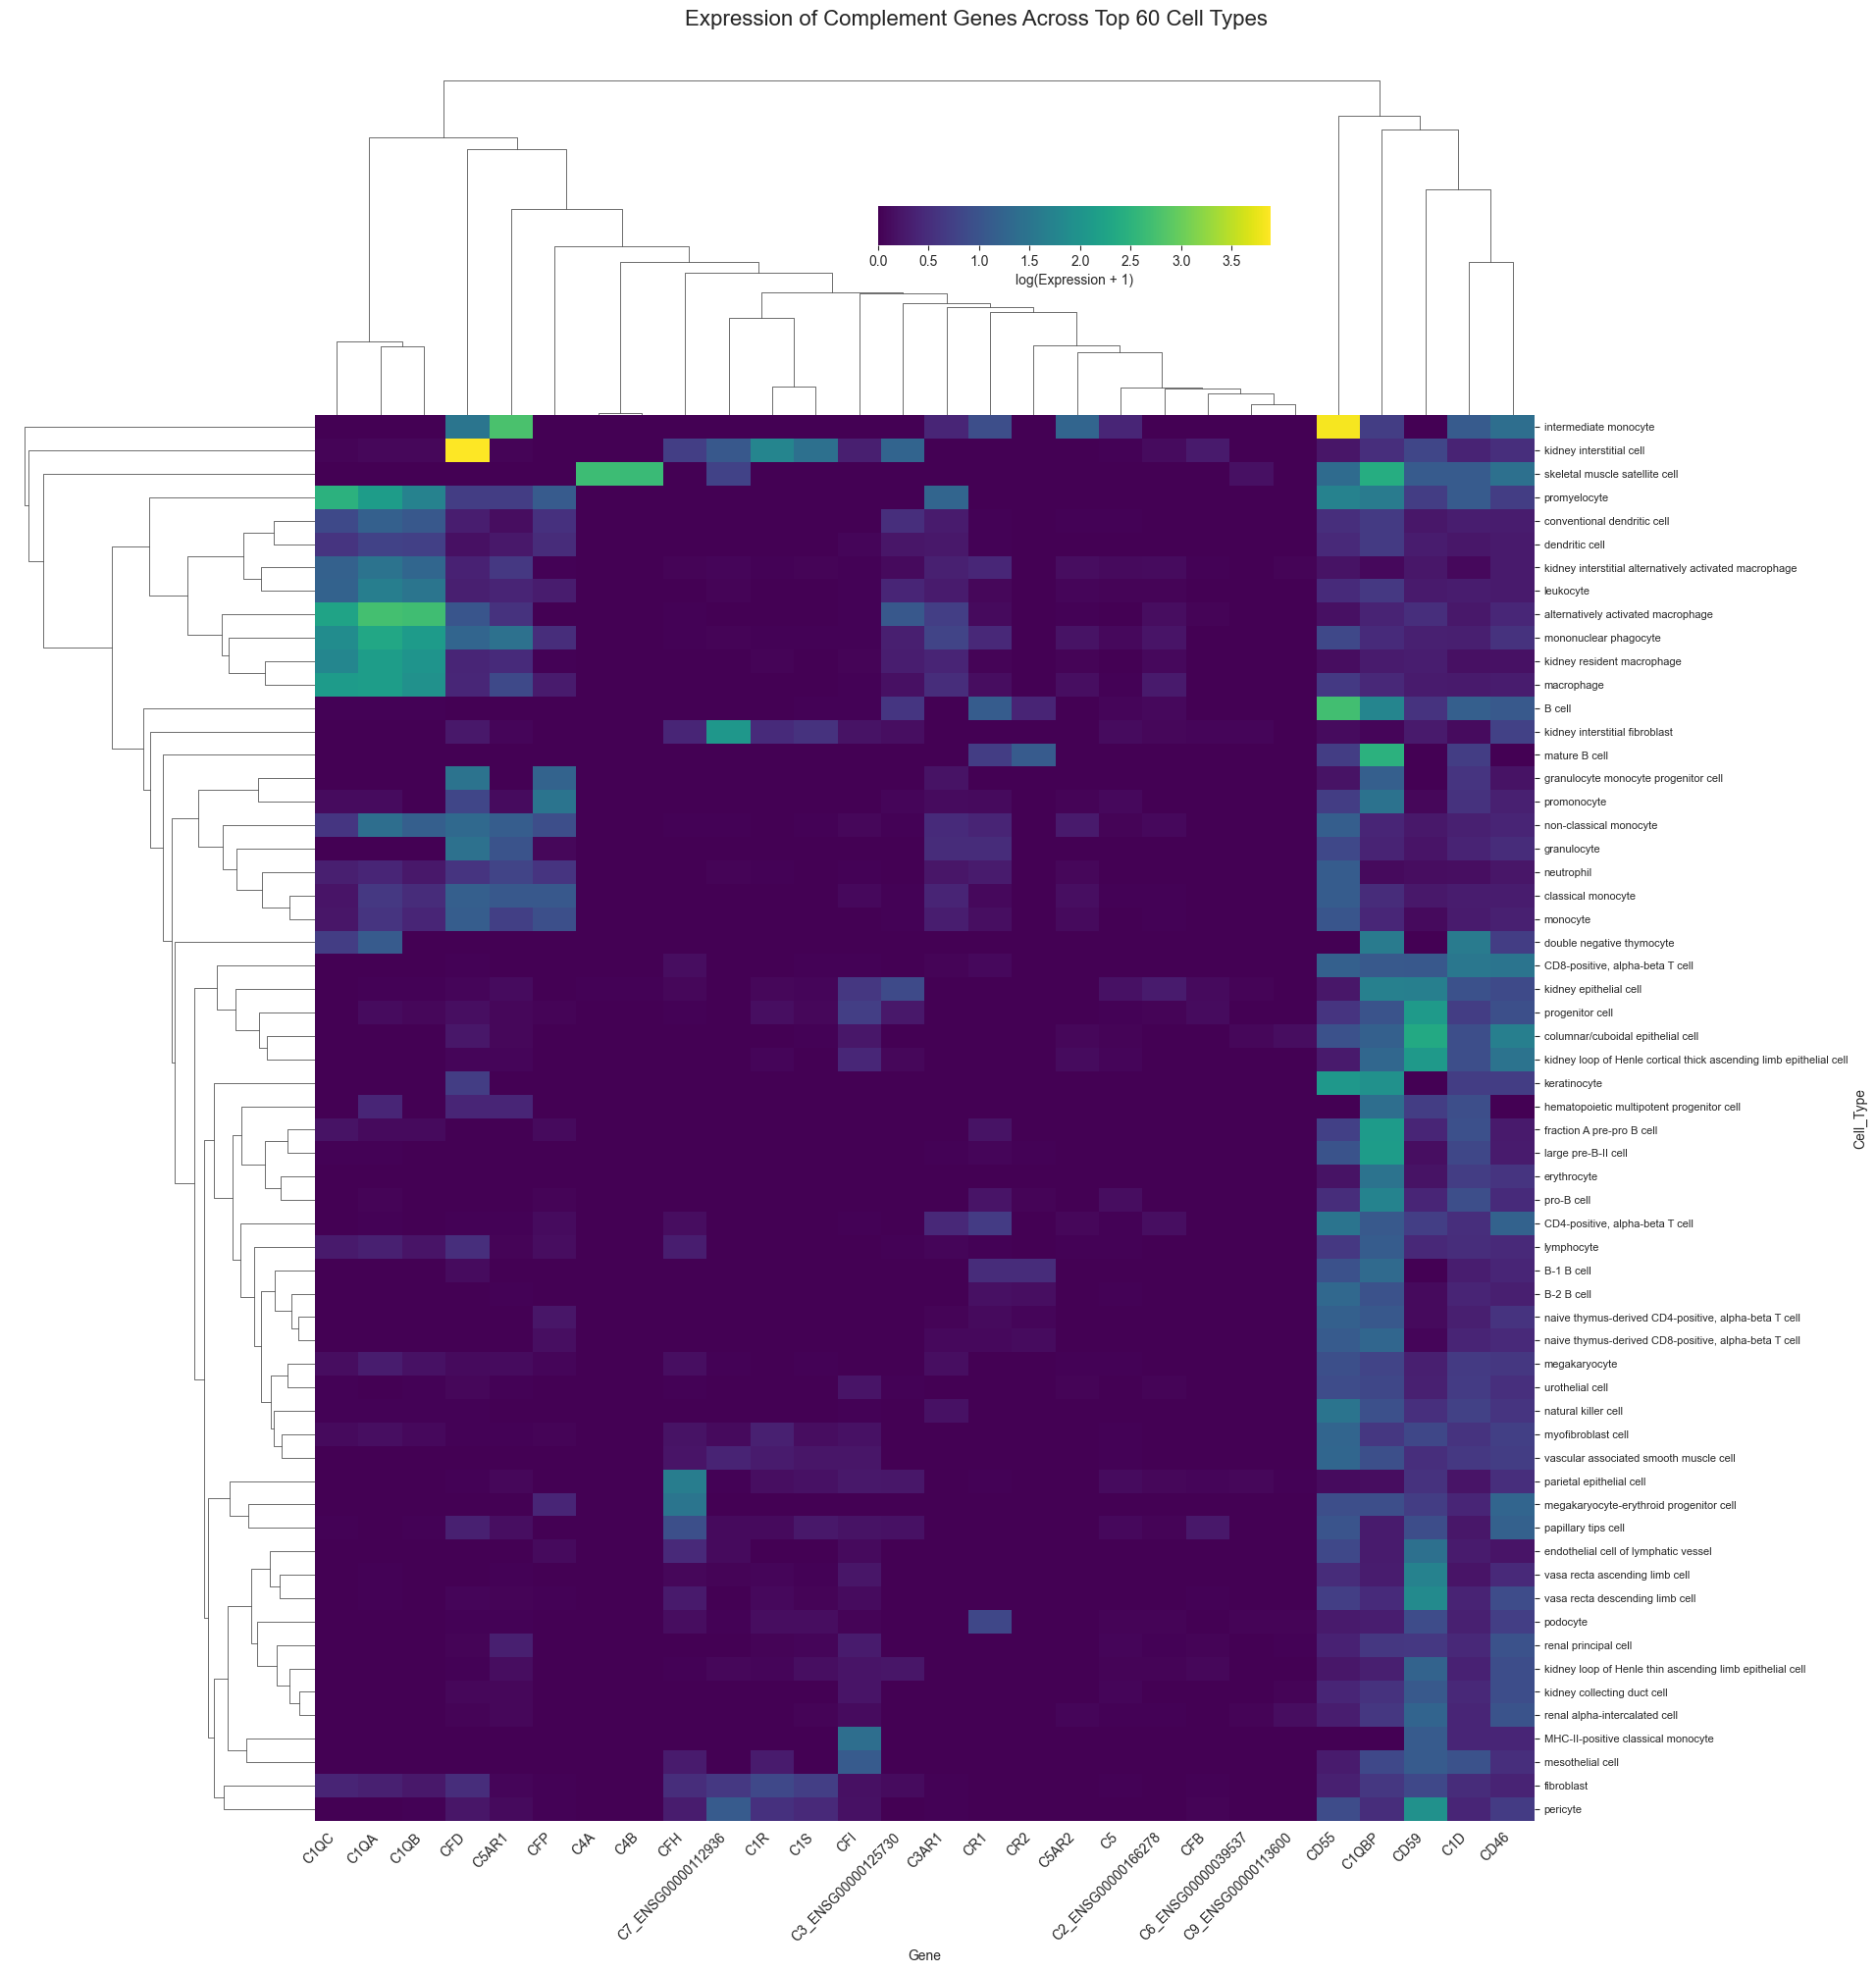

In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from mpl_toolkits.axes_grid1 import make_axes_locatable

# List of genes to analyze
genes = ["C1Q", "C1QA", "C1QB", "C1QBP", "C1QC", "C1R", "C1S", "C1D", "C2", "C2_ENSG00000166278", "C3", "C3_ENSG00000125730", "C4", "C4A", "C4B", "C5", "C6", "C6_ENSG00000039537", "C7", "C7_ENSG00000112936", "C8", "C9", "C9_ENSG00000113600", "CFB", "CFD", "CFH", "CFI", "CFP", "MBL", "FCN1", "FCN2", "FCN3", "CD46", "CD55", "CD59", "VCP", "CR1", "CR2", "CR3", "CR4", "C5AR1", "C5AR2", "C3AR1"]

# Ensure the genes are in the dataset
valid_genes = [gene for gene in genes if gene in adata.var_names]

if not valid_genes:
    print("None of the specified genes are in the dataset.")
else:
    print(f"Found {len(valid_genes)} valid genes")

    # Create a dataframe to collect all expression data
    all_expression_data = pd.DataFrame()

    # Collect expression data for each gene
    for gene in valid_genes:
        # Get expression values
        expr_values = adata[:, gene].X.toarray().flatten()

        # Get cell types
        cell_types = adata.obs["cell_type"]

        # Create temporary dataframe for this gene
        temp_df = pd.DataFrame({
            "Gene": gene,
            "Cell_Type": cell_types,
            "Expression": expr_values
        })

        # Append to the main dataframe
        all_expression_data = pd.concat([all_expression_data, temp_df])

    # Calculate mean expression per cell type across all genes
    cell_type_mean_expr = all_expression_data.groupby("Cell_Type")["Expression"].mean()

    # Get top 60 cell types based on mean expression
    top_60_cell_types = cell_type_mean_expr.sort_values(ascending=False).head(60).index.tolist()

    # Filter data to only include top 60 cell types
    filtered_data = all_expression_data[all_expression_data["Cell_Type"].isin(top_60_cell_types)]

    # Pivot the data to create a matrix suitable for heatmap plotting
    heatmap_data = filtered_data.pivot_table(
        index="Cell_Type",
        columns="Gene",
        values="Expression",
        aggfunc="mean"
    )

    # Apply log transformation for better visualization
    heatmap_data_log = np.log1p(heatmap_data)

    # Plot clustered heatmap
    plt.figure(figsize=(20, 20))
    g = sns.clustermap(
        heatmap_data_log,
        figsize=(20, 20),
        cmap="viridis",
        yticklabels=True,
        xticklabels=True,
        cbar_pos=(0.45, 0.9, 0.2, 0.02),  # Move colorbar to top (x, y, width, height)
        cbar_kws={'orientation': 'horizontal', 'label': 'log(Expression + 1)'},
        dendrogram_ratio=(0.2, 0.2),
        row_cluster=True,  # Cluster cell types
        col_cluster=True   # Cluster genes
    )

    # Adjust font sizes and rotate x-axis labels for better readability
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=8)
    g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=10, rotation=45, ha='right')

    plt.suptitle("Expression of Complement Genes Across Top 60 Cell Types", y=1.02, fontsize=16)
    plt.show()

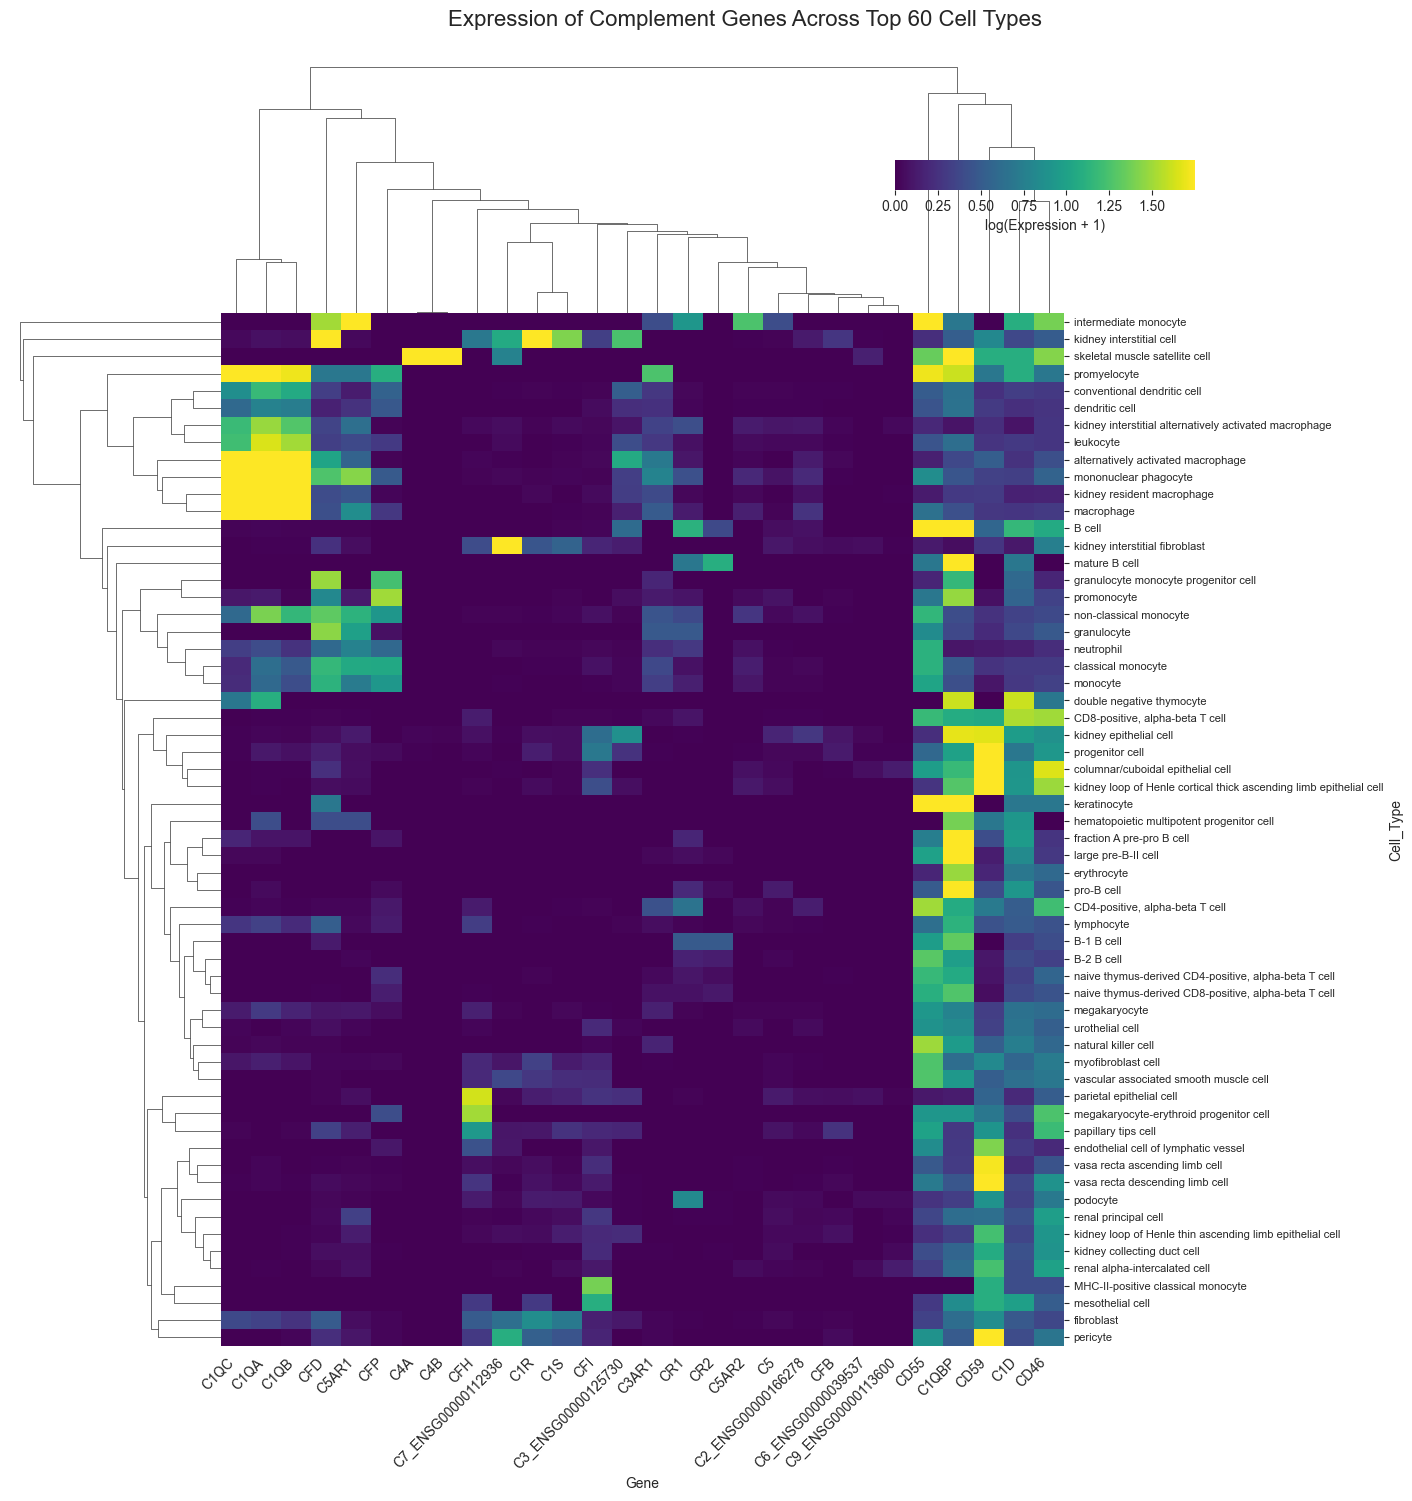

In [6]:
"""
Generate a clustered heatmap of complement system gene expression across kidney cell types.
This visualization helps identify cell types with high complement expression and reveals
expression patterns across the complement pathway components.
"""

# Dictionary of complement system genes with their Ensembl IDs (formatted for readability)
# List of complement system genes to analyze
all_genes = {
    'C1D': 'ENSG00000197223',
    'C1QA': 'ENSG00000173372',
    'C1QB': 'ENSG00000173369',
    'C1QBP': 'ENSG00000108561',
    'C1QC': 'ENSG00000159189',
    'C1R': 'ENSG00000159403',
    'C1S': 'ENSG00000182326',
    'C2': 'ENSG00000166278',
    'C2_ENSG00000166278': 'ENSG00000166278',
    'C3': 'ENSG00000125730',
    'C3_ENSG00000125730': 'C3_ENSG00000125730',
    'C3AR1': 'ENSG00000171860',
    'C4A': 'ENSG00000244731',
    'C4B': 'ENSG00000224389',
    'C5': 'ENSG00000106804',
    'C5AR1': 'ENSG00000197405',
    'C5AR2': 'ENSG00000134830',
    'C6': 'ENSG00000039537',
    'C6_ENSG00000039537': 'C6_ENSG00000039537',
    'C7': 'ENSG00000112936',
    'C7_ENSG00000112936': 'ENSG00000112936',
    'C9': 'ENSG00000113600',
    'C9_ENSG00000113600': 'ENSG00000113600',
    'CD46': 'ENSG00000117335',
    'CD55': 'ENSG00000196352',
    'CD59': 'ENSG00000085063',
    'CFB': 'ENSG00000243649',
    'CFD': 'ENSG00000197766',
    'CFH': 'ENSG00000000971',
    'CFI': 'ENSG00000205403',
    'CFP': 'ENSG00000126759',
    'CR1': 'ENSG00000203710',
    'CR2': 'ENSG00000117322',
    'FCN1': 'ENSG00000085265',
    'FCN2': 'ENSG00000160339',
    'FCN3': 'ENSG00000142748',
    'VCP': 'ENSG00000165280'
}

# Filter for genes present in the dataset
valid_genes = adata.var['feature_name']

# Create expression data dataframe with optimized vectorization
all_expression_data = pd.DataFrame({
    "Gene": np.repeat(valid_genes, adata.shape[0]),
    "Cell_Type": np.tile(adata.obs["cell_type"].values, len(valid_genes)),
    "Expression": np.concatenate([adata[:, gene].X.toarray().flatten() for gene in valid_genes])
})

# Identify top 60 cell types by mean expression and create log-transformed heatmap data
top_cell_types = all_expression_data.groupby("Cell_Type")["Expression"].mean().nlargest(60).index.tolist()
heatmap_data_log = np.log1p(
    all_expression_data[all_expression_data["Cell_Type"].isin(top_cell_types)]
    .pivot_table(index="Cell_Type", columns="Gene", values="Expression", aggfunc="mean")
)

# Generate clustered heatmap with optimized visualization parameters
g = sns.clustermap(
    heatmap_data_log, figsize=(15,15), cmap="viridis",
    yticklabels=True, xticklabels=True,
    cbar_pos=(0.6, 0.9, 0.2, 0.02),  # Position colorbar at top
    cbar_kws={'orientation': 'horizontal', 'label': 'log(Expression + 1)'},
    dendrogram_ratio=(0.2, 0.2),  # Control space for dendrograms
    row_cluster=True, col_cluster=True,  # Enable hierarchical clustering
    square=True,  # Ensure square cells in the heatmap
    robust=True,  # Improve color distribution
)

# Format labels for improved readability
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=8)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=10, rotation=45, ha='right')
plt.suptitle("Expression of Complement Genes Across Top 60 Cell Types", y=1.02, fontsize=16)
plt.show()

In [7]:
adata
# adata.obs[['assay']].value_counts()
# adata.obs[['is_primary_data']].value_counts()

AnnData object with n_obs × n_vars = 597379 × 28
    obs: 'dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data', 'disease'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'

In [8]:
import scanpy as sc

# Step 1: Normalize the total counts per cell
sc.pp.normalize_total(adata)

# Step 2: Log transform the data
sc.pp.log1p(adata)

# Step 3: Batch correction using ComBat
# Assuming 'assay' is the column in adata.obs that indicates the assay type
sc.pp.combat(adata, key='assay')

# Step 4: PCA
sc.pp.pca(adata)

/Users/aumchampaneri/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/scanpy/preprocessing/_combat.py:350: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


In [9]:
import scanpy as sc

sc.pp.recipe_seurat(adata, log=False, plot=True)

/Users/aumchampaneri/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/scanpy/preprocessing/_recipes.py:112: FutureWarning: Use sc.pp.highly_variable_genes instead
  filter_result = filter_genes_dispersion(
/Users/aumchampaneri/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/scanpy/preprocessing/_utils.py:31: RuntimeWarning: Mean of empty slice.
  return X.mean(axis=axis, dtype=dtype)


ValueError: Cannot cut empty array

In [23]:
import scanpy as sc

sc.pp.recipe_zheng17(adata, n_top_genes=28, log=False, plot=True)

/Users/aumchampaneri/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/scanpy/preprocessing/_recipes.py:187: FutureWarning: Use sc.pp.highly_variable_genes instead
  filter_result = filter_genes_dispersion(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/aumchampaneri/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/scanpy/preprocessing/_deprecated/highly_variable_genes.py:211: RuntimeWarning: invalid value encountered in divide
  np.abs(


IndexError: index 27 is out of bounds for axis 0 with size 17

In [25]:
adata


AnnData object with n_obs × n_vars = 0 × 0
    obs: 'dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data', 'disease', 'n_counts_all', 'n_genes'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs', 'n_counts', 'n_cells'